# Project on Avocado dataset
Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation AveragePrice - the average price of a single avocado type - conventional or organic year - the year Region - the city or region of the observation Total Volume - Total number of avocados sold 4046 - Total number of avocados with PLU 4046 sold 4225 - Total number of avocados with PLU 4225 sold 4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label

The dataset can be seen in two angles to find the city or region and find the average price .

Task: Classification /Regression

In this project we are performing the classification on the dataset Output variable :- region

# Importing required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Importing Dataset

In [2]:
data=pd.read_csv("avocado.csv")
data.head()

,sl,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Familiarisation with the Dataset

In [3]:
data.shape

(1517, 14)

In [4]:
data.drop(['sl','Date','year'],axis=1 ,inplace=True)

In [5]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


# Null/Missing Value Analysis
Checking the null/missing value is the first and required step in the EDA analyis. Finding Null/Missing value and handling them contributes in the better performance of the model.

In [6]:
data.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
dtype: int64

>Fetching data count as per region

In [7]:
print(data.region.value_counts())

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
TotalUS                25
Nashville              25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
HarrisburgScranton     19
Syracuse               19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
Roanoke                17
MiamiFtLaude

>Encoding the non numeric column into numeric

In [8]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
list1=['type','region']
for val in list1:
    data[val]=Le.fit_transform(data[val].astype(str))

In [9]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,7


# DATA VISUALISATION USING VARIOUS PLOTS

# 1.Plotting countplot of the data as per region


---CountsPlots for Region---



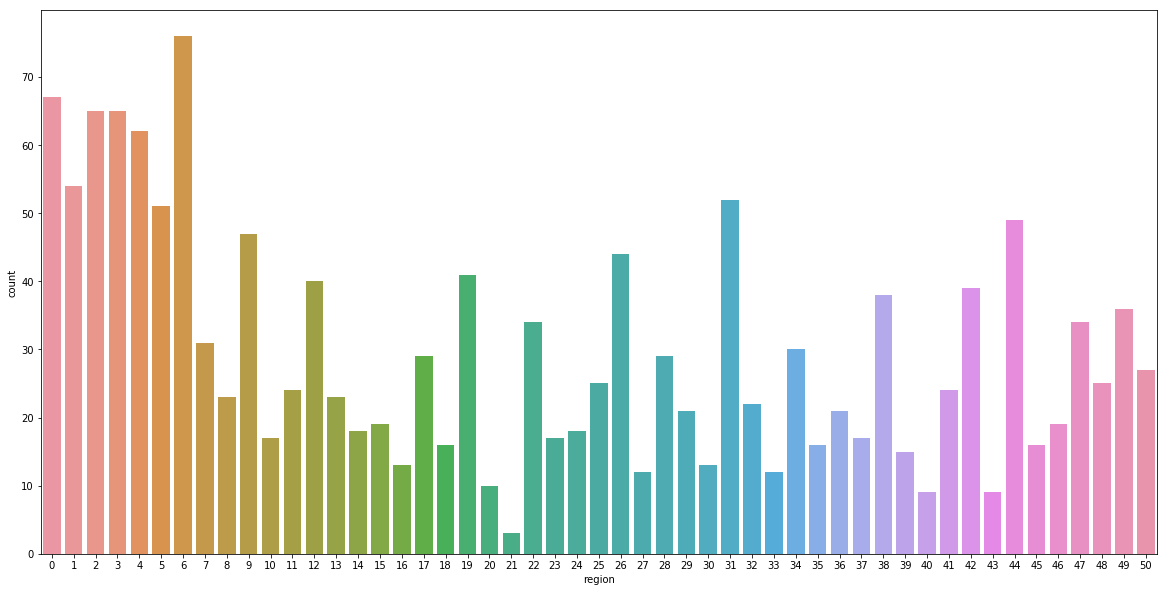

In [10]:
print('\n---CountsPlots for Region---\n')
plt.figure(figsize=(20,10))
sns.countplot(data['region'])


California has highest number of data count

# 2.BoxPlot

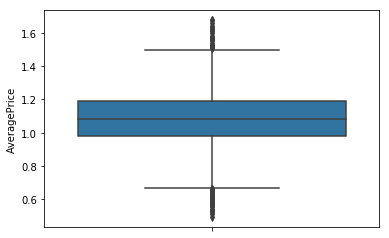

In [11]:
sns.boxplot(y='AveragePrice',data=data)


# 3.Distribution plot.
This plot will display the distribution of the features and will let us know skewness of the dependent variables

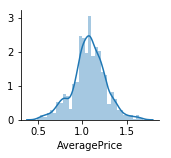

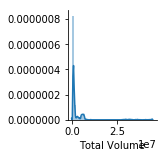

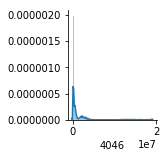

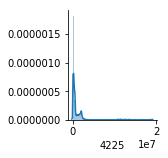

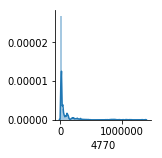

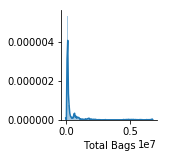

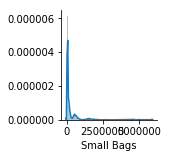

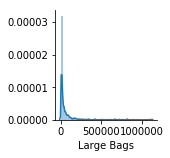

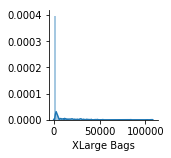

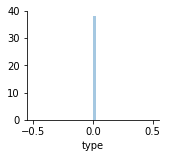

In [12]:
import warnings
warnings.filterwarnings("ignore")
columns=data.columns[:-1]
for val in columns:
#Plotting Probablity Density Function Curve for the age : -
    sns.FacetGrid(data,size=2.3)\
    .map(sns.distplot,val)\
    .add_legend();
plt.show();

# 4.LinePlots

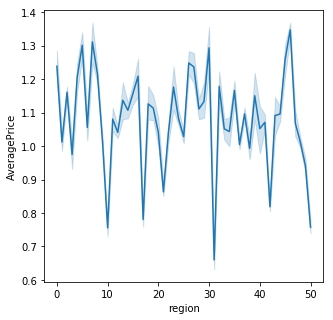

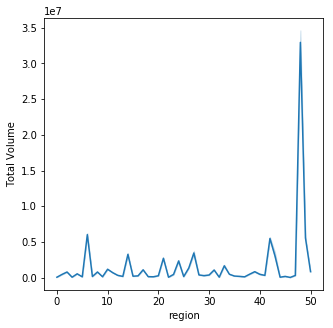

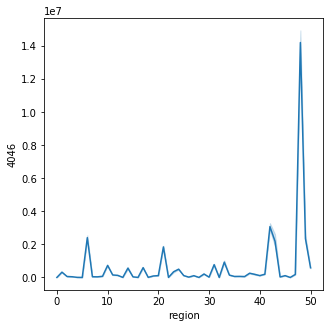

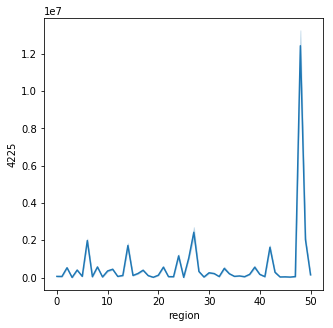

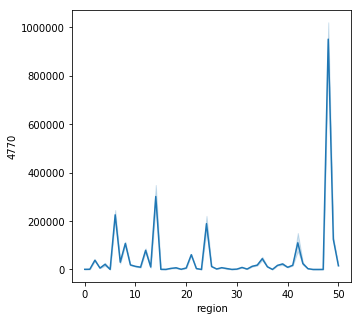

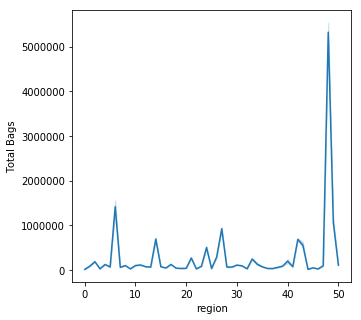

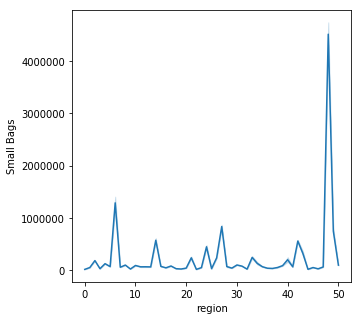

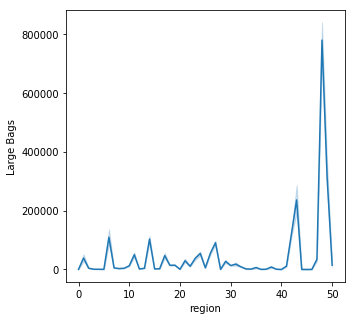

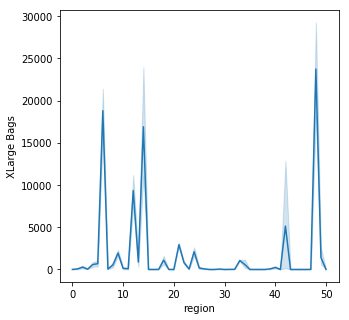

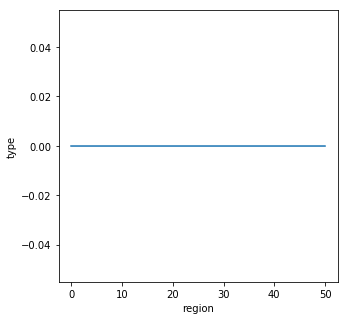

In [13]:
column=list(data.columns[:-1])
for val in column:
    plt.figure(figsize=(5,5))
    sns.lineplot(x='region',y=val, data=data)
    plt.show()

# 5.Regression Plots

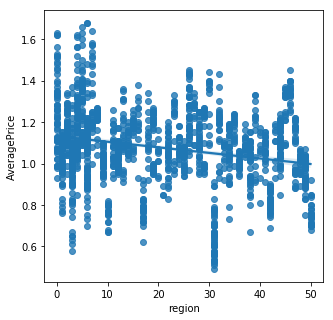

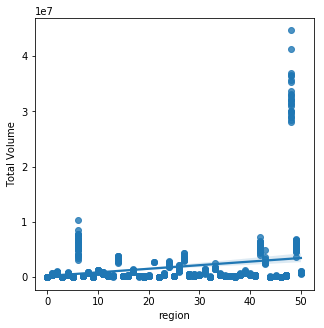

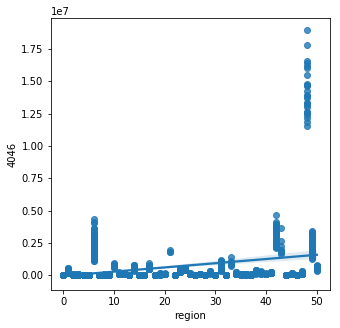

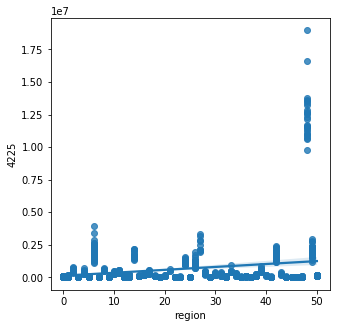

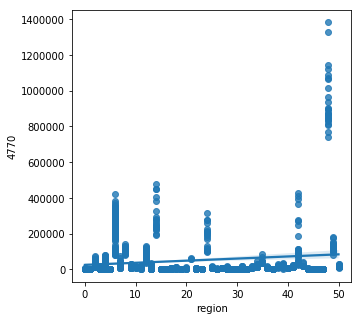

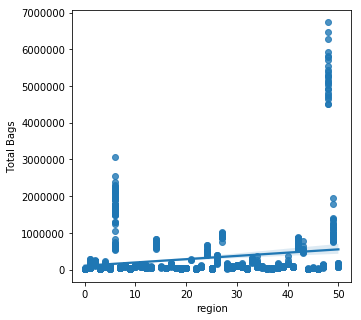

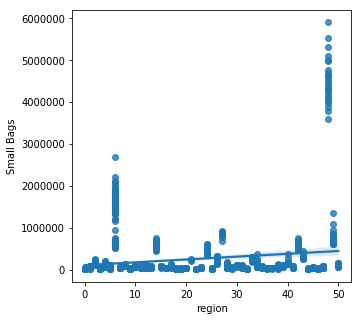

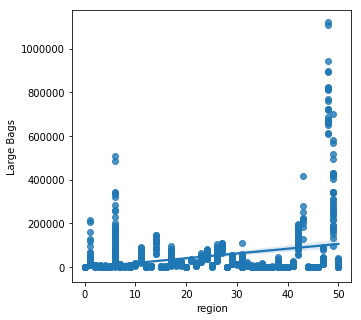

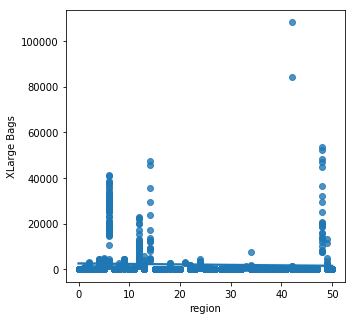

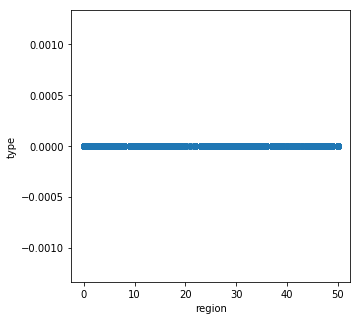

In [14]:
column=list(data.columns[:-1])
for val in column:
    plt.figure(figsize=(5,5))
    sns.regplot(x='region',y=val, data=data)
    plt.show()

# 6.PairPlots

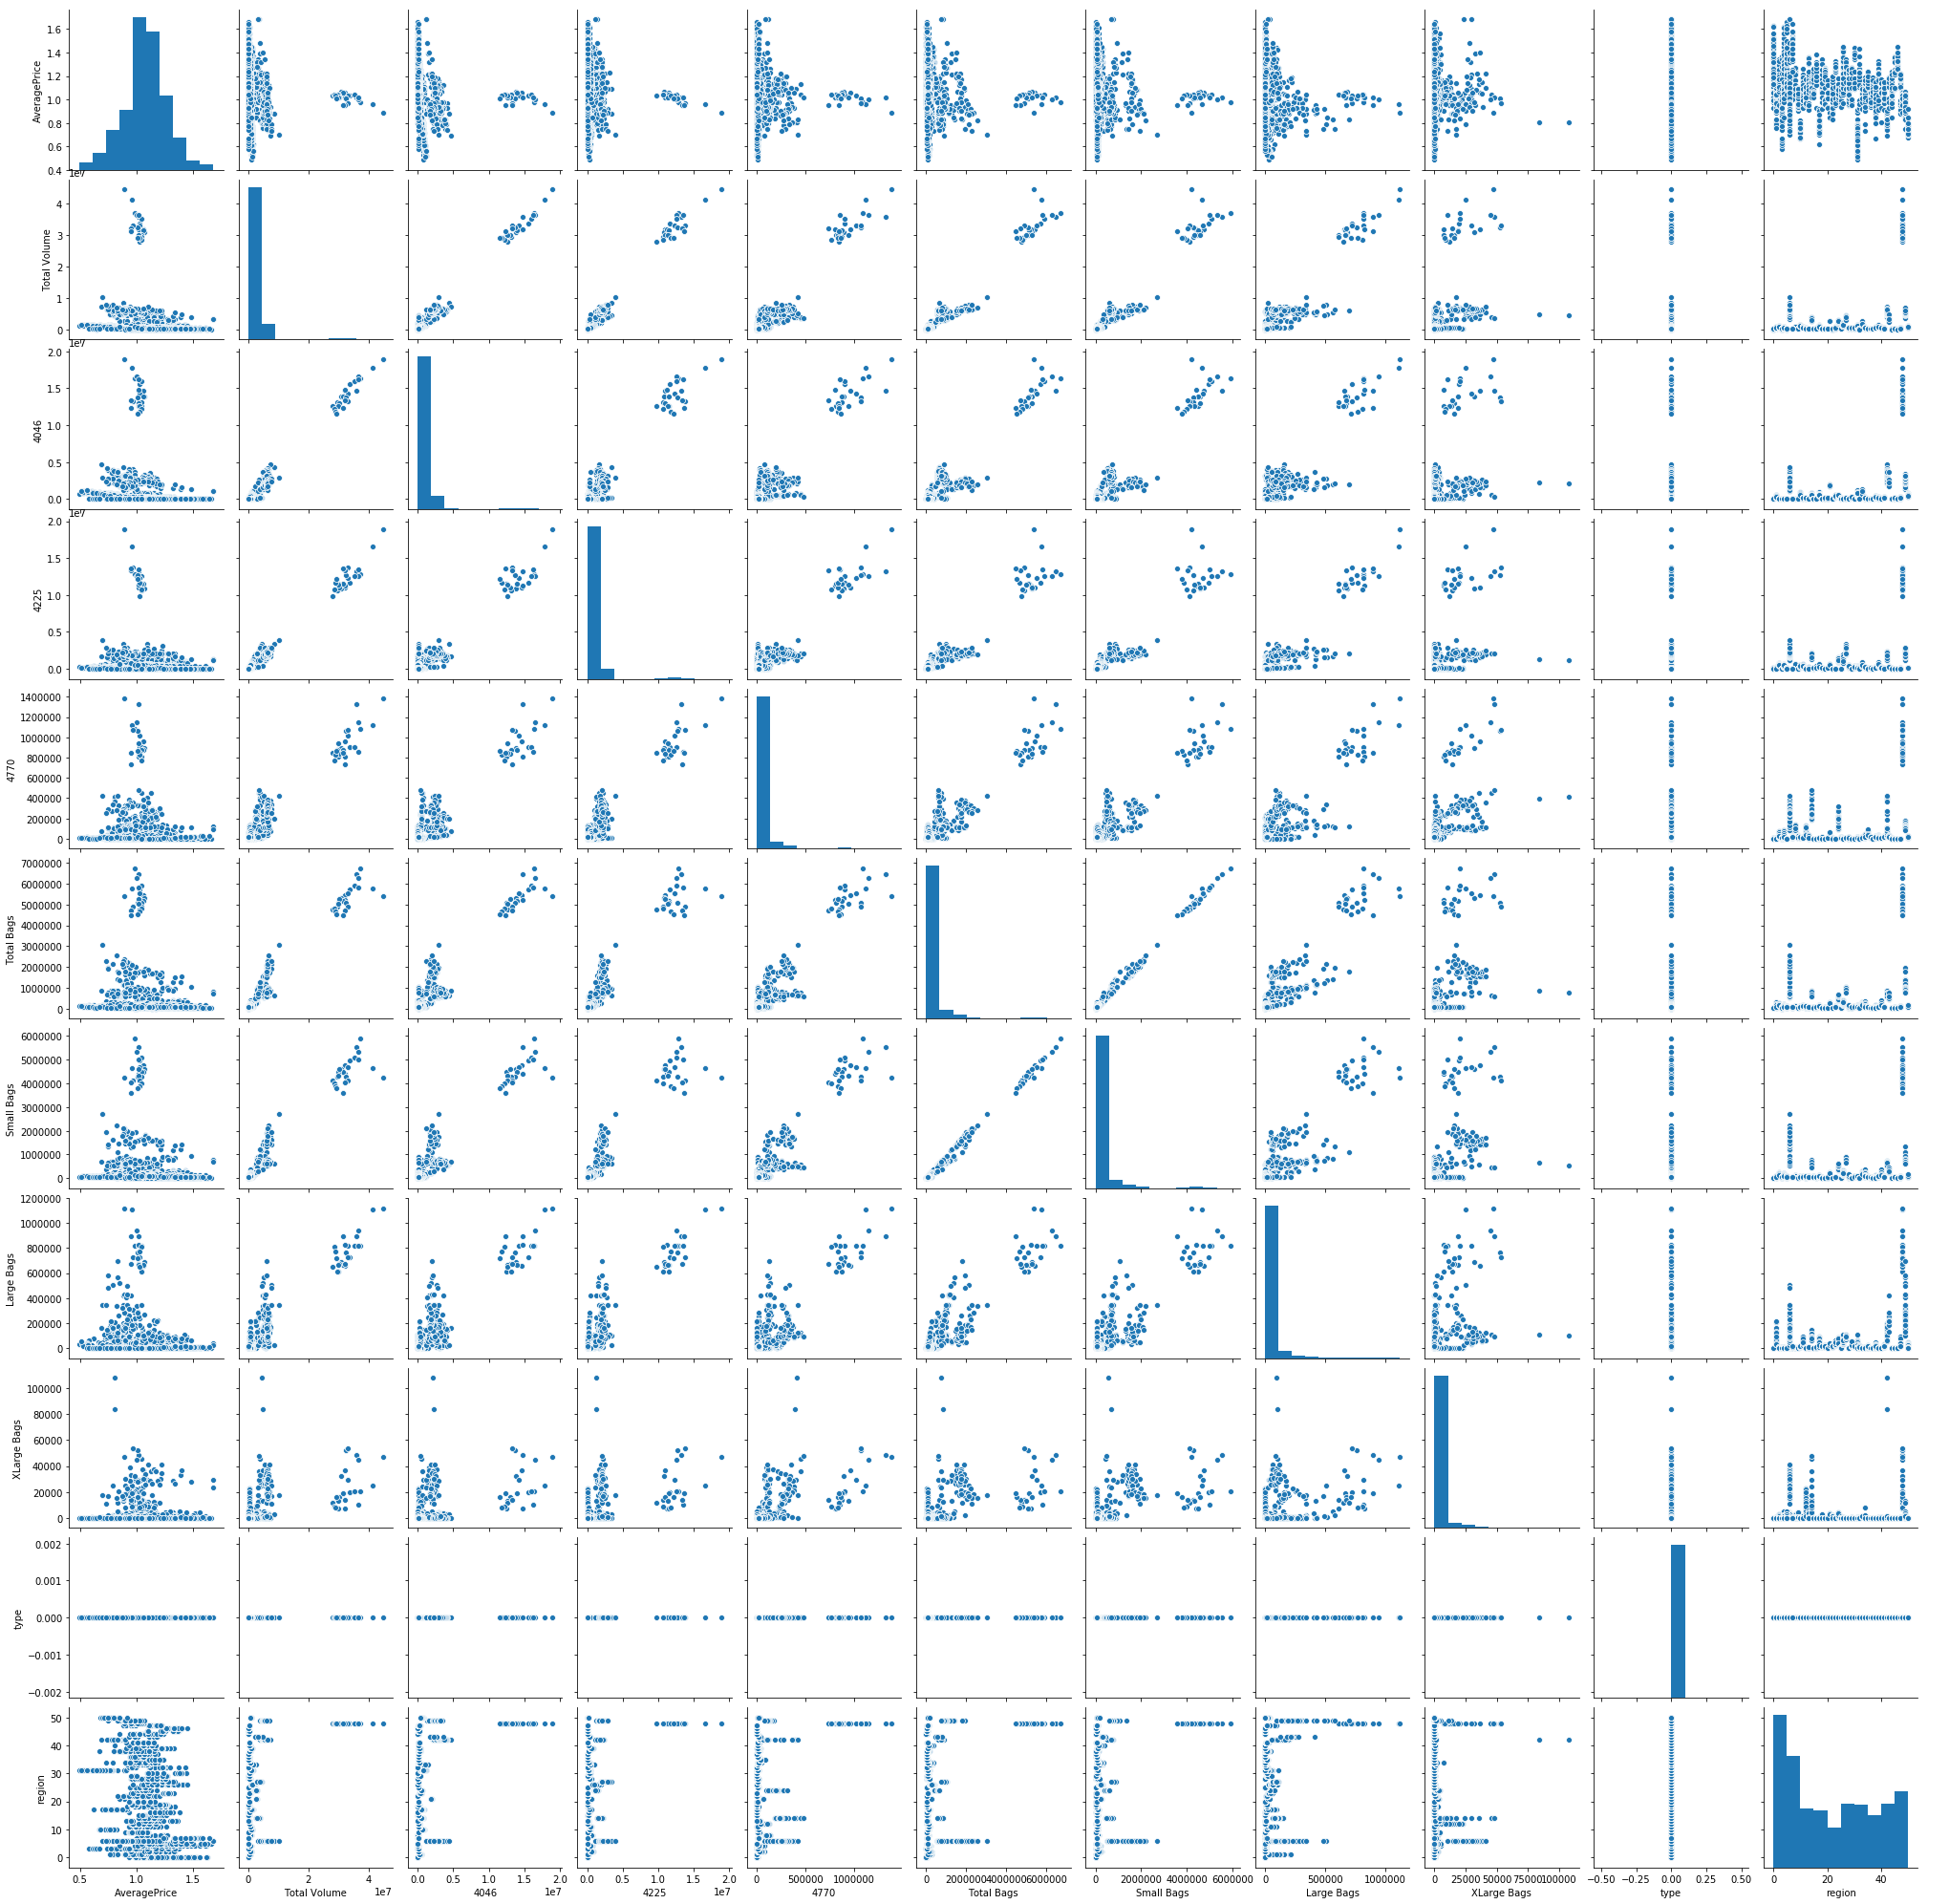

In [15]:
sns.pairplot(data)

# CorRelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

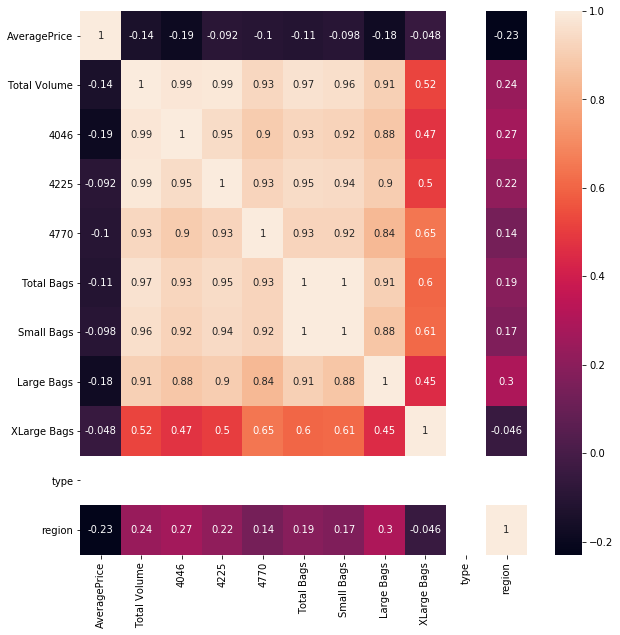

In [16]:
df_cor=data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_cor,annot=True)

# Feature selection based on correlation matrix
From the below code I have removed the features which are having correlation of more than 0.9. This results in stable parameter estimates of classification which makes it easy to assess the effect of independent variables on dependent variables

In [17]:
columns = np.full((df_cor.shape[0]),True,dtype=bool)
for i in range(df_cor.shape[0]):
    for j in range(i+1, df_cor.shape[0]):
        if df_cor.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

From analysing the correlation matrix we can remove the highly dependent features , after removing the features which are correlated with greater >0.9 value we ended up getting 5 features which will be further taken for the our analysis.

In [18]:
data.shape

(1517, 5)

# Skewness

In [19]:
data.skew()

AveragePrice   -0.109444
Total Volume    6.200138
XLarge Bags     5.775077
type            0.000000
region          0.288146
dtype: float64

In [20]:
data.drop(['type'],axis=1,inplace=True)

# Handling outliers and Standardisation of the data

In [21]:
from scipy.stats import zscore
zs=np.abs(zscore(data))
zs

array([[1.35048079, 0.34696593, 0.29272731, 1.3143384 ],
       [1.45639674, 0.34907791, 0.29272731, 1.3143384 ],
       [0.76783831, 0.33478463, 0.29272731, 1.3143384 ],
       ...,
       [2.14485045, 0.32120275, 0.1820374 , 0.88028586],
       [2.09189247, 0.31878364, 0.29272731, 0.88028586],
       [1.88006056, 0.3201721 , 0.29272731, 0.88028586]])

In [22]:
df=data[(zs<3).all(axis=1)]

In [23]:
df.shape

(1451, 4)

In [24]:
print('shape of the data with outliers  ' ,data.shape)
print('shape of the data without  outliers  ' ,df.shape)

shape of the data with outliers   (1517, 4)
shape of the data without  outliers   (1451, 4)


In this section we have treated the outliers with the help of ZSCORE using threshold value as 3 ,The features which are having the zscore value > 3 are treated as outliers and has been removed.

Hence the new shape of the dataset after outliers removal is(1451, 4) . Now this will be our finalised Dataset for modelling.

# Separating the input and output variables

In [25]:
y=df.iloc[:,-1]
x=df.iloc[:,:-1]
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

# Applying Various Classification Models¶
In this section we will be applying several classification models and hence we will be checking following performance matrix :

1) Accuracy score

2) Mean of crossing validation score using accuracy as scoring

3) Std Deviation of crossing validation score using accuracy as scoring

4) Confusion Matrix

We have also used GridSearch for tuning the parameters

Importing all the required library

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Function for Accuracy Score
This function is built to find the best accuracy score depending on the random state while splitting the model. This function prints the best accuracy score and returns the random state for that accuracy score

In [28]:
def accur_at_rstate(model,x,y):
    random_state=np.arange(42,101)
    accuracy=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        #DT=DecisionTreeClassifier()
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if accuracy_score(test_y,pred) > accuracy:
            accuracy=accuracy_score(test_y,pred)
            Final_r_state=r_state
        #Calculating 
    print('The maximum accuracy reached is {} at random state {}' .format(accuracy,Final_r_state))
    return Final_r_state
    

# Function for Confusion Matrix
This function will print the confusion matrix

In [29]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
def confusion_matrix1(model,x,y,r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
    pred=model.predict(test_x)
    sns.heatmap(confusion_matrix(test_y,pred),annot=True)

# Function for highest_accuracy
This function finds the highest_accuracy of the model

In [30]:
def highest_accuracy(model,x,y,Final_r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=Final_r_state)
    model.fit(train_x,train_y)
    pred = model.predict(test_x)
    return accuracy_score(test_y,pred)

Below function is created to make a list of highest_accuracy generated by different classifier , so that it can be compared at last, for the selection of the best model

In [31]:
accuracy=[]
def list_accuracy(x):
    accuracy.append(x)
    return accuracy

# 1.DecisionTreeClassifier

In [32]:
from sklearn.model_selection import GridSearchCV
#max_depth = np.arange(30)
depth={'max_depth':range(1,30)}
DT=DecisionTreeClassifier()
gs=GridSearchCV(DT,depth,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 25}

In [33]:
DT=DecisionTreeClassifier(max_depth=25)
Final_Random_state=accur_at_rstate(DT,x,y)
from sklearn.model_selection import cross_val_score
print('Cross_val_score ',cross_val_score(DT,x,y,cv=5 ,scoring='accuracy').mean())


The maximum accuracy reached is 0.5986238532110092 at random state 73
Cross_val_score  0.47216257850456217


In [34]:
Max_accuracy=highest_accuracy(DT,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 2.KNeighborsClassifier

In [35]:
from sklearn.model_selection import GridSearchCV
neighbour={'n_neighbors':range(1,50),'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
Knn=KNeighborsClassifier()
gs=GridSearchCV(Knn,neighbour,cv=10)
gs.fit(x,y)
gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 3}

In [36]:
Knn=KNeighborsClassifier(n_neighbors=3,algorithm='auto')
Final_Random_state=accur_at_rstate(Knn,x,y)
print('Cross_val_score ',cross_val_score(Knn,x,y,cv=5 ,scoring='accuracy').mean())

The maximum accuracy reached is 0.5045871559633027 at random state 60
Cross_val_score  0.42456452186277993


In [37]:
Max_accuracy=highest_accuracy(Knn,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 3.Support Vector Classifier

In [38]:
gamma={'gamma':range(1,30),'kernel':['Poly','rbf']}
svc=SVC()
gs=GridSearchCV(svc,gamma,cv=10)
gs.fit(x,y)
gs.best_params_

{'gamma': 12, 'kernel': 'rbf'}

In [39]:
svc=SVC(gamma=12,kernel='rbf')
Final_Random_state=accur_at_rstate(svc,x,y)
print('Cross_val_score ',cross_val_score(svc,x,y,cv=5 ,scoring='accuracy').mean())


The maximum accuracy reached is 0.4724770642201835 at random state 63
Cross_val_score  0.39217442824979265


In [40]:
Max_accuracy=highest_accuracy(svc,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 4.Logistic Regression

In [44]:
C={'C':range(1,30),'penalty':['l1', 'l2', 'elasticnet']}
log=LogisticRegression()
gs=GridSearchCV(log,C,cv=10)
gs.fit(x,y)
gs.best_params_

{'C': 29, 'penalty': 'l2'}

In [45]:
log=LogisticRegression(C=29,penalty='l2')
Final_Random_state=accur_at_rstate(log,x,y)
print('Cross_val_score ',cross_val_score(log,x,y,cv=5 ,scoring='accuracy').mean())

The maximum accuracy reached is 0.45642201834862384 at random state 88
Cross_val_score  0.3859367223604693


In [46]:
Max_accuracy=highest_accuracy(svc,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# Appying ensemble model for better results


# 1.RandomForestClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':range(1,50),'max_depth':range(1,30),}
RF=RandomForestClassifier()
gs=GridSearchCV(RF,parameters,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 11, 'n_estimators': 29}

In [48]:
RF=RandomForestClassifier(n_estimators=29,max_depth=11)
Final_Random_state=accur_at_rstate(RF,x,y)
print('Cross_val_score ',cross_val_score(RF,x,y,cv=5 ,scoring='accuracy').mean())

The maximum accuracy reached is 0.6376146788990825 at random state 48
Cross_val_score  0.523870126792274


In [50]:
Max_accuracy=highest_accuracy(RF,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 2.BaggingClassifier

In [51]:
from sklearn.ensemble import BaggingClassifier
parameters={'n_estimators':range(1,30),'base_estimator':[log,svc,Knn,DT]}
BG=BaggingClassifier()
gs=GridSearchCV(RF,parameters,cv=10)
gs.fit(x,y)
gs.best_params_

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=25, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'n_estimators': 18}

In [52]:
BG=BaggingClassifier(n_estimators=18,base_estimator=DT)
Final_Random_state=accur_at_rstate(BG,x,y)
print('Cross_val_score ',cross_val_score(BG,x,y,cv=5 ,scoring='accuracy').mean())

The maximum accuracy reached is 0.6238532110091743 at random state 73
Cross_val_score  0.5100770233439981


In [53]:
Max_accuracy=highest_accuracy(BG,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# Plotting Bargraph to Analyse the Performance Matrix

In [54]:
model =['DT','KNN','SVC','LOG','RF','BAGGING']


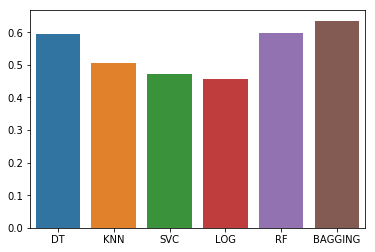

In [55]:
sns.barplot(x=model,y=List_acc)

from the above barplot --> BaggingClassifier has highest accuracy

After performing several classification models on this data set and after analysing the performance matrix for all the models , it is concluded that BaggingClassifier is giving the best results which are as follows :

The maximum accuracy reached is 0.6238532110091743 at random state 73
Cross_val_score  0.5100770233439981

Therefore BaggingClassifier is selected as our final model

# Final Model

Accuracy 0.6146788990825688
-----------------Confusion Matrix---------------------


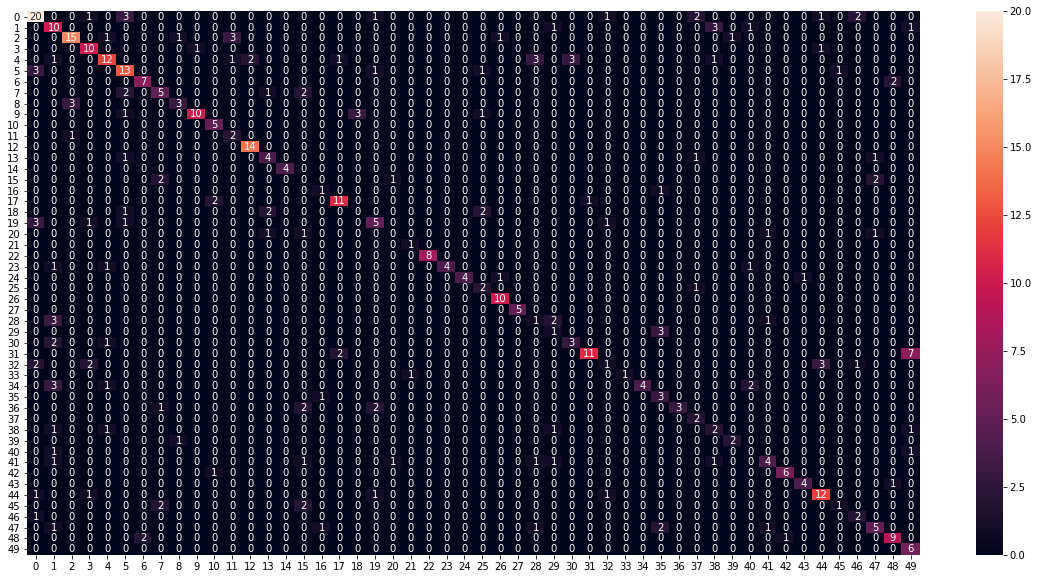

In [61]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=73)
BG=BaggingClassifier(n_estimators=18,base_estimator=DT)
BG.fit(train_x,train_y)
pred = BG.predict(test_x)
print('Accuracy',accuracy_score(test_y,pred))
print('-----------------Confusion Matrix---------------------')
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(test_y,pred),annot=True)

In [62]:
print('mean cross_val_score',cross_val_score(BG,x,y,cv=5,scoring='accuracy').mean())
print('std deviation of cross_val_score',cross_val_score(BG,x,y,cv=5,scoring='accuracy').std())

mean cross_val_score 0.4983718450053324
std deviation of cross_val_score 0.06097199760998458


In [63]:
print('classification Report \n',classification_report(test_y,pred))

classification Report 
               precision    recall  f1-score   support

           0       0.67      0.65      0.66        31
           1       0.42      0.62      0.50        16
           2       0.79      0.68      0.73        22
           3       0.67      0.83      0.74        12
           4       0.71      0.50      0.59        24
           5       0.59      0.68      0.63        19
           6       0.78      0.78      0.78         9
           7       0.50      0.50      0.50        10
           8       0.60      0.50      0.55         6
           9       0.91      0.67      0.77        15
          10       0.62      1.00      0.77         5
          11       0.33      0.67      0.44         3
          12       0.88      1.00      0.93        14
          13       0.50      0.57      0.53         7
          14       1.00      1.00      1.00         4
          15       0.00      0.00      0.00         5
          16       0.33      0.50      0.40         2
   

# Saving the Model

In [64]:
from sklearn.externals import joblib
joblib.dump(BG,"BG_Avacado.pkl")

['BG_Avacado.pkl']